# Stacking

Несмотря на то, что в открытом доступе существует довольно много реализаций стекинга, некоторые из которых даже представлены в виде библиотечных функций, лучше сделать собственную. Стекинг - не классический алгоритм решения задачи, а скорее набор правил для помощи в решении задачи другим алгоритмам. Если вы серьезно займетесь машинным обучением, рано или поздно вам скорее всего захочется что-нибудь поменять в этом наборе правил, поэтому собственная реализация с понятным вам кодом будет как нельзя кстати.

В этом домашнем задании вы создадите собственную функцию для блендинга/классического стекинга моделей, которая пригодится вам в дальнейшем.

Ниже вы увидите заготовку для функции, где:

- models - список объектов базовых алгоритмов

- meta_alg - мета-алгоритм

data_train, targets_train, data_test, targets_test - тренировочные и тестовые признаки и целевые переменные

- test_size - размер тестовых данных для блендинга в промежутке (0, 1)

- cv - количество разбиений для кросс-валидации

In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, RocCurveDisplay

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, test_size=None, cv=5):
#

### 1.
В следующей ячейке в теле функции определен условный оператор if-else. После elif вместо pass пропишите код из лекции с некоторыми новыми вставками в таком порядке: деление data_train и targets_train на тренировочные и валидационные данные с помощью функции train_test_split, где test_size=test_size из определения функции; определение матрицы meta_mtrx; цикл, в котором заполняется meta_mtrx: сначала строка, где модель обучается с помощью метода fit на тренировочных данных из разбиения, затем строка, где матрица заполняется значениями предсказаний моделей на валидационных данных. На этом цикл заканчивается.

После цикла добавьте строку с методом fit мета-алгоритма: обучите его на значениях полученной матрицы meta_mtrx и целевой переменной для валидационных данных.

Определите матрицу meta_mtrx_test. Напишите цикл, где эта матрица заполняется предсказаниями базовых моделей на тестовых данных data_test.

После цикла сделайте предсказания мета-алгоритма для значений матрицы meta_mtrx_test.

Дополните код еще одним оператором if, который будет проверять, существуют ли данные targets_test для проверки качества работы модели на тестовых данных: если targets_test не является None, тогда выведите метрику roc_auc_score для предсказаний мета-алгоритма на тестовых данных.

In [3]:
def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:
        pass

    elif 0 < test_size < 1:
        train, valid, train_true, valid_true = train_test_split(data_train,
                                                                targets_train,
                                                                test_size=test_size)
        meta_mtrx = np.empty((valid.shape[0], len(models)))
        for n, model in enumerate(models):
            model.fit(train, train_true)
            meta_mtrx[:, n] = model.predict(valid)
        meta_alg.fit(meta_mtrx, valid_true)

        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
        meta_predict = meta_alg.predict(meta_mtrx_test)
        if targets_test is not None:
            roc_auc_score(targets_test, meta_predict)

    else:
        raise ValueError("test_size must be between 0 and 1")

### 2.
Теперь напишите код стекинга вместо pass после оператора if.

Сразу определите матрицу meta_mtrx. Напишите цикл для заполнения матрицы: сначала напишите строку, где каждый столбец метапризнаков (для каждой модели) заполняется с помощью функции cross_val_predict(base_algotithm, data_train, targets_train, cv, method='predict'); следующая строка - обучите каждый базовый алгоритм на полном тренировочном датасете.

После цикла обучите мета-алгоритм на матрице метапризнаков meta_mtrx. Определите матрицу meta_mtrx_test.

Напишите второй цикл, где матрица meta_mtrx_test заполняется предсказаниями базовых моделей на тестовых данных data_test.

После цикла сделайте предсказания мета-алгоритма для значений матрицы meta_mtrx_test.

Так же, как и для блендинга, напишите код проверки для targets_test и выведите roc_auc_score, если это возможно.

In [21]:
def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):

    if test_size is None:
        meta_mtrx = np.empty((data_train.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, cv=cv, method='predict')
            models[n] = model.fit(data_train, targets_train)
        meta_alg.fit(meta_mtrx)

        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
        meta_predict = meta_alg.predict(meta_mtrx_test)

        if targets_test is not None:
            score = roc_auc_score(targets_test, meta_predict)
            print(f'roc_auc_score = {score}')

    elif 0 < test_size < 1:
        train, valid, train_true, valid_true = train_test_split(data_train,
                                                                targets_train,
                                                                test_size=test_size)
        meta_mtrx = np.empty((valid.shape[0], len(models)))
        for n, model in enumerate(models):
            models[n] = model.fit(train, train_true)
            meta_mtrx[:, n] = model.predict(valid)
        meta_alg.fit(meta_mtrx, valid_true)

        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
        meta_predict = meta_alg.predict(meta_mtrx_test)

        if targets_test is not None:
            score = roc_auc_score(targets_test, meta_predict)
            print(f'roc_auc_score = {score}')

    else:
        raise ValueError("test_size must be between 0 and 1")

### 3.
Базовая функция стекинга готова. Теперь проверим, как она работает. Ниже представлен уже знакомый нам датасет Titanic, разделенный на тренировочный и тестовый датасеты; предопределенные базовые алгоритмы и мета-алгоритм. Ваша задача - составить список базовых алгоритмов и запустить функцию в трех различных вариантах (при этом в каждом из них все значения data_train, targets_train, data_test, targets_test должны быть определены):

1. Вызвать исключение "test_size must be between 0 and 1".

2. Установить test_size=0.3; вывести AUC и массив полученных предсказаний.

3. Оставить test_size=None; вывести AUC и массив полученных предсказаний.

In [22]:
class Stacking:

    def __init__(self, models, meta_alg, random_state=None, cv=5):
        self.models = models
        self.meta_alg = meta_alg
        self.random_state = random_state
        self.cv = cv

    def fit(self, data_train, targets_train, test_size=None):
        if test_size is None:
            meta_mtrx = np.empty((data_train.shape[0], len(self.models)))
            for n, model in enumerate(self.models):
                meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, cv=self.cv, method='predict')
                self.models[n].fit(data_train, targets_train)
            self.meta_alg.fit(meta_mtrx, targets_train)

        elif 0 < test_size < 1:
            train, valid, train_true, valid_true = train_test_split(data_train,
                                                                    targets_train,
                                                                    test_size=test_size)
            meta_mtrx = np.empty((valid.shape[0], len(self.models)))
            for n, model in enumerate(self.models):
                self.models[n].fit(train, train_true)
                meta_mtrx[:, n] = self.models[n].predict(valid)
            self.meta_alg.fit(meta_mtrx, valid_true)

        else:
            raise ValueError("test_size must be between 0 and 1")

    def predict(self, data_test, test_size=None):
        if test_size is None:
            meta_mtrx_test = np.empty((data_test.shape[0], len(self.models)))
            for n, model in enumerate(self.models):
                meta_mtrx_test[:, n] = model.predict(data_test)
            meta_predict = self.meta_alg.predict(meta_mtrx_test)
            return meta_predict

        elif 0 < test_size < 1:
            meta_mtrx_test = np.empty((data_test.shape[0], len(self.models)))
            for n, model in enumerate(self.models):
                meta_mtrx_test[:, n] = model.predict(data_test)
            meta_predict = self.meta_alg.predict(meta_mtrx_test)
            return meta_predict


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier


titanic = pd.read_csv('titanic.csv')
targets = titanic.Survived
data = titanic.drop(columns='Survived')

x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    targets,
                                                    train_size=0.8,
                                                    random_state=17)

knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(random_state=17)
svc = SVC(random_state=17)

meta = XGBClassifier(n_estimators=40)

In [7]:
# 1. Вызвать исключение "test_size must be between 0 and 1".
st = Stacking(models=(knn, lr, svc), meta_alg=meta)
st.fit(data_train=x_train,
       targets_train=y_train,
       test_size=2)

ValueError: test_size must be between 0 and 1

[0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1]


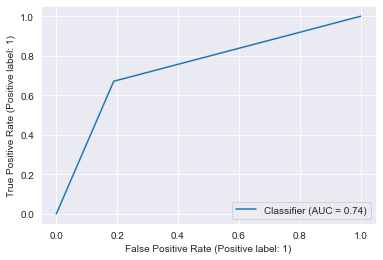

In [24]:
# 2. Установить test_size=0.3; вывести AUC и массив полученных предсказаний.
st.fit(data_train=x_train,
       targets_train=y_train,
       test_size=0.3)
score = roc_auc_score(y_test, st.predict(x_test))
RocCurveDisplay.from_predictions(y_test, st.predict(x_test))
print(st.predict(x_test))

[0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1]


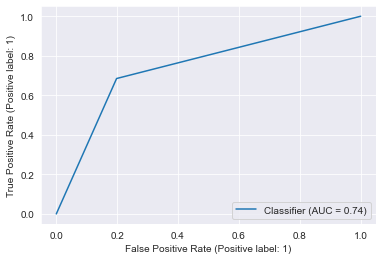

In [25]:
# 3. Оставить test_size=None; вывести AUC и массив полученных предсказаний.
st = Stacking(models=(knn, lr, svc), meta_alg=meta)
st.fit(data_train=x_train, targets_train=y_train)
score = roc_auc_score(y_test, st.predict(x_test))
RocCurveDisplay.from_predictions(y_test, st.predict(x_test))
print(st.predict(x_test))

По мере того, как вы будете использовать эту функцию, вам могут пригодиться такие дополнительные параметры как: random_state, который позволит делать воспроизводимые модели; metrics - список метрик, которые могут быть вычислены; grid_search, который может производить поиск лучших параметров для алгоритмов, и т.д.